In [13]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/gts-seoul.csv")
data['이슬점 온도']

0        19.3
1        19.9
2        18.8
3        22.0
4        22.5
         ... 
32080    15.0
32081    16.1
32082    16.2
32083    16.0
32084    16.4
Name: 이슬점 온도, Length: 32085, dtype: float64

In [21]:
# 1

date = data.loc[data['일시']=='2011-03-21 06:00', ['습도', '풍속', '현지기압', '기온', '이슬점 온도']]
date.sum(axis=1)

2101    1038.9
dtype: float64

In [48]:
#2

data_cut = data[['습도', '풍속', '현지기압', '기온', '이슬점 온도']].dropna(axis=0)
len(data_cut)+data['습도'].mean()+max(data['풍속'])+min(data['기온'])

32128.414242518706

In [49]:
#3

sum(data_cut.corr(method='pearson')['이슬점 온도'][:-1])

1.1792022126818202

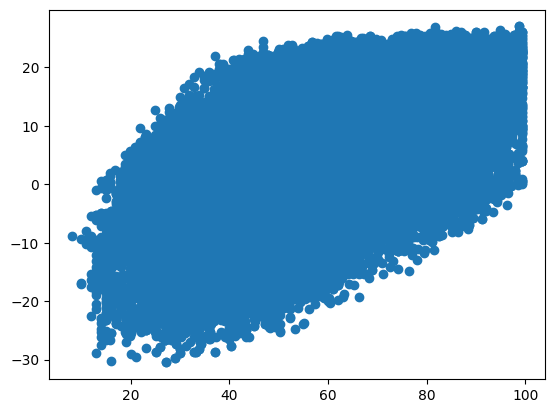

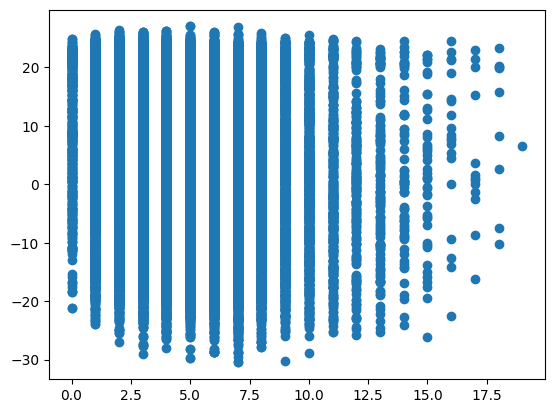

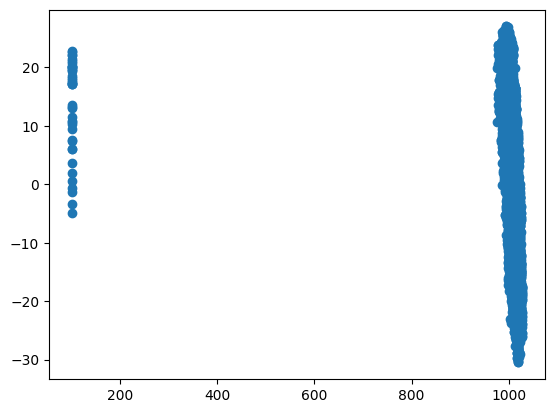

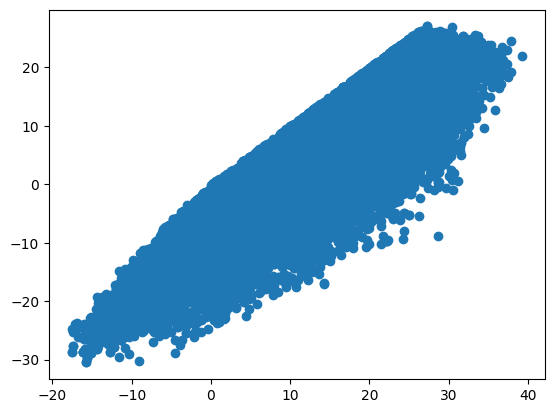

In [50]:
import matplotlib.pyplot as plt

x = [data_cut['습도'], data_cut['풍속'], data_cut['현지기압'], data_cut['기온']]
y = data_cut['이슬점 온도']

for i in range(4):
  plt.scatter(x[i], y)
  plt.show()

In [54]:
#4

data_cut = data_cut.loc[data_cut['현지기압']>=200]
print(data_cut)

         습도    풍속   현지기압    기온  이슬점 온도
0      70.7   3.0  995.0  25.0    19.3
1      61.8   3.0  993.9  27.9    19.9
2      49.7   3.0  992.3  30.5    18.8
3      66.8   6.0  992.1  28.8    22.0
4      79.6   4.0  993.4  26.3    22.5
...     ...   ...    ...   ...     ...
32080  65.7  11.0  987.0  21.7    15.0
32081  83.8   5.0  989.7  18.9    16.1
32082  84.9   7.0  991.2  18.8    16.2
32083  85.9   4.0  991.7  18.4    16.0
32084  88.7   6.0  992.7  18.3    16.4

[32027 rows x 5 columns]


In [55]:
#5

sum(data_cut.corr(method='pearson')['이슬점 온도'][:-1])

0.6187252015474853

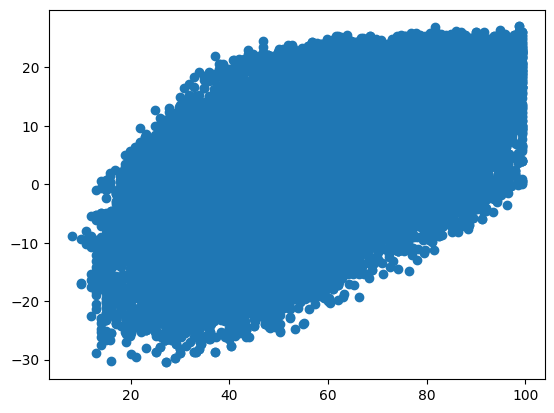

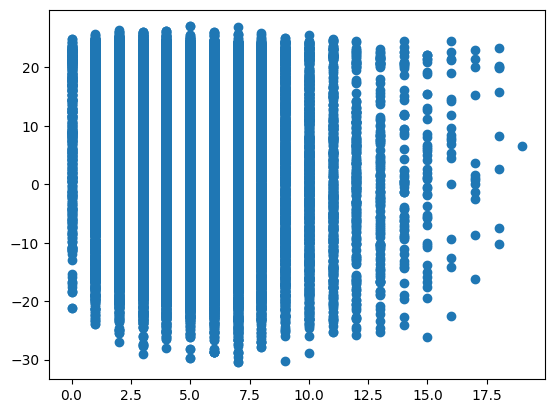

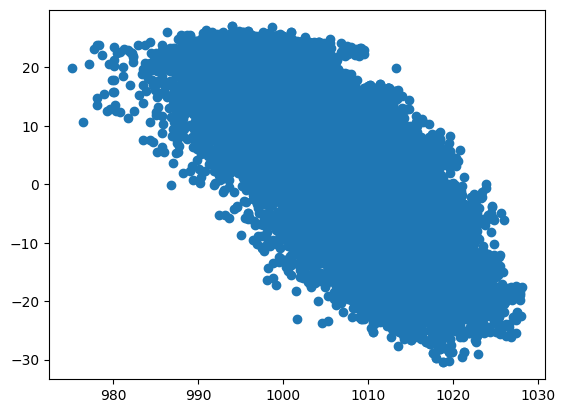

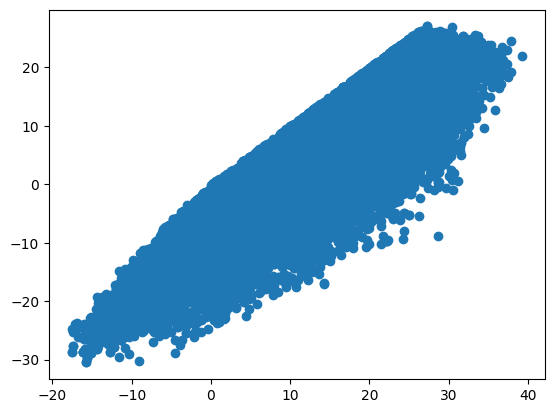

In [56]:
#6

x = [data_cut['습도'], data_cut['풍속'], data_cut['현지기압'], data_cut['기온']]
y = data_cut['이슬점 온도']

for i in range(4):
  plt.scatter(x[i], y)
  plt.show()

In [57]:
#8

from sklearn.linear_model import LinearRegression

x = data_cut[['습도', '풍속', '현지기압', '기온']]
y = data_cut[['이슬점 온도']]

lr = LinearRegression()
lr.fit(x, y)

print(lr.coef_, lr.intercept_)

[[ 0.2676329  -0.03078923  0.00952646  0.92936961]] [-32.91662937]


In [59]:
#9

x = np.array(x)
h = np.dot(x, lr.coef_.T)+lr.intercept_
cost = ((h-y)**2).mean()
print(cost)

이슬점 온도    1.168515
dtype: float64


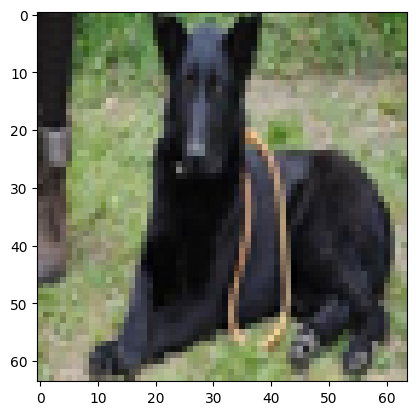

In [4]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

data = pickle.load(open("/content/drive/MyDrive/mid_animal_data_pub.pkl", "rb"))
plt.imshow(data['train_images'][2])
plt.show()

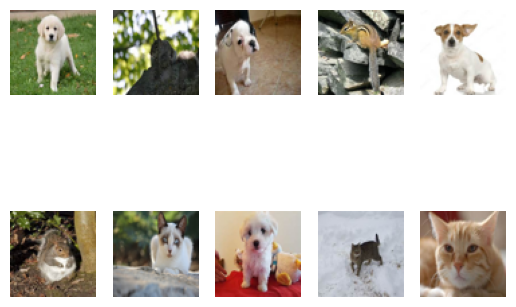

In [2]:
#10

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(data['test1_images'][i])
  plt.axis('off')
plt.show()

In [5]:
#11

x = data['train_vectors'][0]
y = data['test1_vectors'][1]

cos_sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
cos_sim

-0.23914206

In [15]:
idx = []
for i in range(10):
  x = data['test1_vectors'][i]
  sim = []
  for j in range(len(data['train_vectors'])):
    y = data['train_vectors'][j]
    cos_sim = np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))
    sim.append((cos_sim, j))
  sim.sort(key=lambda x:x[0],reverse=True)
  idx.append(sim[0][1])
  idx.append(sim[1][1])
  idx.append(sim[2][1])
print(sum(idx))

14090


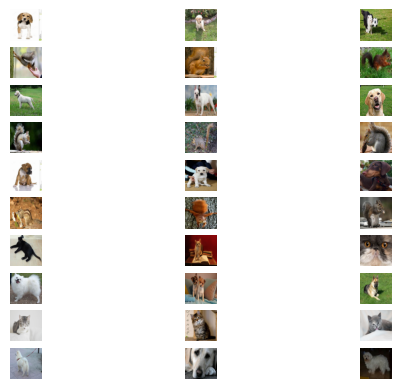

In [16]:
#13

for i in range(30):
  plt.subplot(10,3,i+1)
  plt.imshow(data['train_images'][idx[i]])
  plt.axis('off')
plt.show()

In [24]:
#14

import torch
import torch.nn as nn
import torch.nn.functional as F

x_train = torch.from_numpy(data['train_vectors'])
y_train = torch.from_numpy(data['train_labels'])

model = nn.Linear(256, 3)

optim = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(10001):
  z = model(x_train)
  cost = F.cross_entropy(z,y_train)

  optim.zero_grad()
  cost.backward()
  optim.step()

  with torch.no_grad():
    if epoch%1000 == 0:
      print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 5.458352565765381
epoch: 1000, cost: 7.760636071907356e-05
epoch: 2000, cost: 6.01817955612205e-05
epoch: 3000, cost: 4.5360724470810965e-05
epoch: 4000, cost: 3.2140014809556305e-05
epoch: 5000, cost: 2.1717245545005426e-05
epoch: 6000, cost: 1.4188351997290738e-05
epoch: 7000, cost: 9.05305023479741e-06
epoch: 8000, cost: 5.682314167643199e-06
epoch: 9000, cost: 3.5260050026408862e-06
epoch: 10000, cost: 2.1715263756050263e-06


In [33]:
x_test = torch.from_numpy(data['test2_vectors'])
y = model(x_test)
print(torch.argmax(y, dim=1))

tensor([2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 2, 0,
        1, 1, 1, 1, 2, 2])
